#### iris 데이터셋 활용 꽃잎 너비 예측 모델
- 데이터셋 : iris.csv에서 2개 Feature  사용
- 구현 프레임워크 : Pytorch

[1] 모듈 로딩 및 데이터 준비

In [80]:
# 모듈 로딩 
import torch                        # 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn               # 인공신경망 관련 모듈
import torch.nn.functional as F     # 손실, 거리 등 함수 관련 모듈
import torch.optim as optimizer     # 최적화 기법 관련 모듈

import pandas as pd                 # 데이터 파일 분석 관련 모듈

In [81]:
torch.manual_seed(1)

In [82]:
# 데이터 로딩 : CSV ==> DataFrame
DATA_FILE = '../data/iris.csv'

irisDF = pd. read_csv(DATA_FILE, usecols=[2,3])
irisDF.head(2)

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2


[2] 모델 준비
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형관계 >> 선형모델 ==> nn.Linear

In [83]:
# in_features : petal.length 1개
# out_features : petal.width 1개
model = nn.Linear(1,1)

In [84]:
# 가중치와 절편 확인
for name, param in model.named_parameters():
    print(f'[{name}, {param}]\n')

[weight, Parameter containing:
tensor([[0.5153]], requires_grad=True)]

[bias, Parameter containing:
tensor([-0.4414], requires_grad=True)]



[3] 최적화 인스턴스 준비

In [85]:
# 모델의 가중치와 절편을 최적화 ==> 인스턴스에 전달
adam_optim = optimizer.Adam(model.parameters(), lr=0.1)

[4] 학습 ==> 개발자가 구현

-[4-1] 데이터셋 Tensor화 진행 : 데이터준비 시 진행 하거나 또는 학습 전 진행

In [86]:
featureTS = torch.from_numpy(irisDF[['petal.length']].values).float()
featureTS.shape

torch.Size([150, 1])

In [87]:
targetTS = torch.from_numpy(irisDF[['petal.width']].values).float()
targetTS.shape

torch.Size([150, 1])

[4-2] 학습진행 : 진행전    
    - 학습횟수 결정 => 에포크 설정   
    - 학습결과 저장 => 손실저장 변수

In [88]:
EPOCH = 10 # 처음부터 끝까지

In [89]:
# 모델 학습 함수
def training():

    loss_history= []

    for epoch in range(EPOCH):

        # 1. 학습진행 - forward
        pre_y = model(featureTS)

        # 2. 오차계산 - 손실함수
        loss = F.mse_loss(pre_y, targetTS)  # loss >> tensor
        loss_history.append(loss.item())

        # 3. 최적화 - 가중치, 절편 업데이트 backward
        adam_optim.zero_grad() # 지금 이것들도 다 tensor
        loss.backward()
        adam_optim.step()

        # 4. 학습결과 출력 및 저장
        print(f'[{epoch}/{EPOCH}] LOSS : {loss}')

    return loss_history

In [90]:
# 모델 학습 진행
loss = training()

[0/10] LOSS : 0.16012583673000336
[1/10] LOSS : 0.074522964656353
[2/10] LOSS : 0.13772442936897278
[3/10] LOSS : 0.07824525237083435
[4/10] LOSS : 0.04498450458049774
[5/10] LOSS : 0.07436980307102203
[6/10] LOSS : 0.09182848036289215
[7/10] LOSS : 0.06934763491153717
[8/10] LOSS : 0.04540804773569107
[9/10] LOSS : 0.04900302737951279


In [91]:
loss

[0.16012583673000336,
 0.074522964656353,
 0.13772442936897278,
 0.07824525237083435,
 0.04498450458049774,
 0.07436980307102203,
 0.09182848036289215,
 0.06934763491153717,
 0.04540804773569107,
 0.04900302737951279]

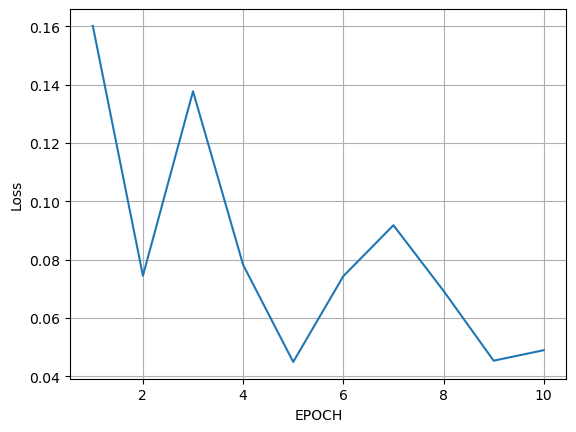

In [92]:
# 학습 후 loss 시각화
import matplotlib.pyplot as plt

plt.plot(range(1,11), loss)
plt.xlabel('EPOCH')
plt.ylabel('Loss')
plt.grid()
plt.show()